In [2]:
import pandas as pd
import numpy as np

In [3]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [4]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [6]:
df=pd.read_csv('data_perovskites.csv')

In [7]:
df=df[df['Lowest distortion']!='-']

In [8]:
df.isin(['-']).sum(axis=0)

Chemical formula                0
A                               0
B                               0
In literature                   0
Valence A                       0
Valence B                       0
Radius A [ang]                  0
Radius B [ang]                  0
Lowest distortion               0
Formation energy [eV/atom]      0
Stability [eV/atom]             0
Magnetic moment [mu_B]        960
Volume per atom [A^3/atom]      0
Band gap [eV]                   0
a [ang]                         0
b [ang]                         0
c [ang]                         0
alpha [deg]                     0
beta [deg]                      0
gamma [deg]                     0
Vacancy energy [eV/O atom]    362
dtype: int64

In [9]:
df['Goldschmidt Tolerance']=(df['Radius A [ang]']+1.4)/((2**.5)*(df['Radius B [ang]']+1.4))

In [10]:
df['Octahedral factor']=(df['Radius B [ang]']/1.4)

In [10]:
truedf=df[df['In literature']==True]

In [11]:
truedf.to_csv('experimentally proven.csv')

In [11]:
df

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom],Goldschmidt Tolerance,Octahedral factor
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.73,0.85,0,20.84,0.33,4.71,4.71,4.71,90,90,90,3.15,0.707107,0.800000
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.96,-0.06,0,14.49,0,5.78,6.08,8.25,90,90,90,0.82,0.758259,0.678571
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.53,-0.11,0,11.49,4.31,3.86,3.86,3.86,90,90,90,6.7,0.918510,0.385714
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.4,0.22,0,14.36,0,5.78,6.01,8.26,90,90,90,3.63,0.928078,0.371429
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.01,-0.06,0,15.19,0.75,5.9,6.75,7.63,90,90,90,0.81,0.764768,0.664286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.64,1.2,0.34,12.2,0,3.94,3.94,3.94,90,90,90,0.19,0.801621,0.442857
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.13,1.42,0.2,15.28,0,4.24,4.24,4.24,90,90,90,-4.92,0.704032,0.642857
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.46,0.21,0,13.14,4.01,5.56,5.73,8.25,90,90,90,-6.18,0.689053,0.678571
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.63,1.21,0,10.8,0,3.78,3.78,3.78,90,90,90,-0.76,0.756670,0.528571


In [12]:
df=df[df['Valence A']!='element not in BV']

In [13]:
df=df[df['Valence A']!='not balanced']

In [14]:
df

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom],Goldschmidt Tolerance,Octahedral factor
76,AgAsO3,Ag,As,False,1,5,1.28,0.46,tetragonal,-0.82,0.29,-,11.37,0,3.57,3.57,4.46,90,90,90,0.53,1.018842,0.328571
78,AgBO3,Ag,B,False,3,3,0.75,0.27,cubic,-0.35,1.07,-,8.14,0,3.44,3.44,3.44,90,90,90,-2.64,0.910347,0.192857
81,AgBiO3,Ag,Bi,False,1,5,1.28,0.76,rhombohedral,-0.82,0.06,-,13.66,0,5.77,5.77,5.77,60.4,60.4,60.4,-0.06,0.877336,0.542857
86,AgCrO3,Ag,Cr,False,1,5,1.28,0.49,orthorhombic,-1.24,0.15,0.39,10.55,0,5.36,5.4,7.29,90,90,90,0.04,1.002670,0.350000
100,AgIrO3,Ag,Ir,False,1,5,1.28,0.57,rhombohedral,-0.59,0.15,0.01,11.31,0,5.37,5.37,5.37,61.6,61.6,61.6,1.23,0.961952,0.407143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,ZrTaO3,Zr,Ta,False,1,5,0.89,0.64,cubic,-2.14,0.92,0.37,12.68,0,3.99,3.99,3.99,90,90,90,2.08,0.793762,0.457143
5319,ZrTiO3,Zr,Ti,False,2,4,0.89,0.61,cubic,-2.54,0.74,0.18,11.33,0,3.84,3.84,3.84,90,90,90,2.82,0.805609,0.435714
5322,ZrUO3,Zr,U,False,1,5,0.89,0.76,orthorhombic,-3.05,0.35,0.64,14.51,0,6.1,6.36,7.48,90,90,90,-1.56,0.749664,0.542857
5323,ZrVO3,Zr,V,False,1,5,0.89,0.54,cubic,-2.21,0.88,0.54,11.09,0,3.81,3.81,3.81,90,90,90,2.4,0.834678,0.385714


### Preprocessing

In [12]:
for i in df.columns:
    df=df[df[i]!='-']

In [13]:
df['Lowest distortion'].value_counts()

cubic           2505
orthorhombic    1157
rhombohedral     234
tetragonal        71
Name: Lowest distortion, dtype: int64

In [14]:
categorical = df.select_dtypes(include=[np.object])

numeric = df.select_dtypes(include=[np.int,np.float])
numeric_cols = numeric.columns

In [15]:
non_cat=categorical.drop(['Chemical formula','A','B','Valence A','Valence B','Lowest distortion'],axis=1)

In [16]:
for i in non_cat.columns:
    df[i]=pd.to_numeric(df[i],downcast='float')
    non_cat[i]=pd.to_numeric(non_cat[i],downcast='float')

In [17]:
numeric=pd.concat([numeric,non_cat],axis=1)

In [18]:
numeric

,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,1.12,1.12,0.707107,0.800000,-2.73,0.85,0.00,20.84,0.33,4.71,4.71,4.71,90.0,90.0,90.0,3.15
1,1.12,0.95,0.758259,0.678571,-1.96,-0.06,0.00,14.49,0.00,5.78,6.08,8.25,90.0,90.0,90.0,0.82
2,1.12,0.54,0.918510,0.385714,-3.53,-0.11,0.00,11.49,4.31,3.86,3.86,3.86,90.0,90.0,90.0,6.70
3,1.12,0.52,0.928078,0.371429,-2.40,0.22,0.00,14.36,0.00,5.78,6.01,8.26,90.0,90.0,90.0,3.63
4,1.12,0.93,0.764768,0.664286,-2.01,-0.06,0.00,15.19,0.75,5.90,6.75,7.63,90.0,90.0,90.0,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.89,0.62,0.801621,0.442857,-1.64,1.20,0.34,12.20,0.00,3.94,3.94,3.94,90.0,90.0,90.0,0.19
5325,0.89,0.90,0.704032,0.642857,-2.13,1.42,0.20,15.28,0.00,4.24,4.24,4.24,90.0,90.0,90.0,-4.92
5326,0.89,0.95,0.689053,0.678571,-3.46,0.21,0.00,13.14,4.01,5.56,5.73,8.25,90.0,90.0,90.0,-6.18
5327,0.89,0.74,0.756670,0.528571,-1.63,1.21,0.00,10.80,0.00,3.78,3.78,3.78,90.0,90.0,90.0,-0.76


In [19]:
categorical=categorical.drop(['Formation energy [eV/atom]','Stability [eV/atom]','Magnetic moment [mu_B]','Volume per atom [A^3/atom]','Band gap [eV]','a [ang]','b [ang]','c [ang]','alpha [deg]','beta [deg]','gamma [deg]','Vacancy energy [eV/O atom]'],axis=1)

In [20]:
for i in categorical.columns.drop(['Chemical formula','A','B']):
    print('no of categories in {} are {}'.format(i, df[i].unique()))

no of categories in Valence A are ['element not in BV' 'not balanced' '1' '3' '2' '4' '5']
no of categories in Valence B are ['element not in BV' 'not balanced' '5' '3' '4' '2' '1']
no of categories in Lowest distortion are ['cubic' 'orthorhombic' 'rhombohedral' 'tetragonal']


In [21]:
# Mostly uncorrelated except negative correlation between stability and a,b,c
# a,b and c and alpha,beta and gamma are strongly correlated
# What should be done about the correlation

In [22]:
corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Radius A [ang],Radius B [ang],Goldschmidt Tolerance,Octahedral factor,Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
Radius A [ang],1.00,-0.01,0.82,-0.01,-0.49,-0.54,-0.26,0.17,0.13,0.30,0.29,0.29,0.03,0.03,0.03,0.43
Radius B [ang],-0.01,1.00,-0.57,1.00,-0.13,0.07,-0.12,0.77,0.08,0.40,0.37,0.29,-0.08,-0.08,-0.08,-0.52
Goldschmidt Tolerance,0.82,-0.57,1.00,-0.57,-0.33,-0.49,-0.16,-0.31,0.07,0.03,0.04,0.09,0.06,0.06,0.06,0.62
Octahedral factor,-0.01,1.00,-0.57,1.00,-0.13,0.07,-0.12,0.77,0.08,0.40,0.37,0.29,-0.08,-0.08,-0.08,-0.52
Formation energy [eV/atom],-0.49,-0.13,-0.33,-0.13,1.00,0.61,0.31,-0.17,-0.49,-0.49,-0.49,-0.47,0.09,0.09,0.09,-0.40
Stability [eV/atom],-0.54,0.07,-0.49,0.07,0.61,1.00,0.21,0.17,-0.35,-0.61,-0.63,-0.66,0.22,0.22,0.22,-0.36
Magnetic moment [mu_B],-0.26,-0.12,-0.16,-0.12,0.31,0.21,1.00,-0.11,-0.18,-0.15,-0.16,-0.14,0.03,0.03,0.03,-0.11
Volume per atom [A^3/atom],0.17,0.77,-0.31,0.77,-0.17,0.17,-0.11,1.00,0.00,0.28,0.23,0.10,-0.01,-0.01,-0.01,-0.26
Band gap [eV],0.13,0.08,0.07,0.08,-0.49,-0.35,-0.18,0.00,1.00,0.35,0.35,0.35,-0.13,-0.13,-0.13,0.18
a [ang],0.30,0.40,0.03,0.40,-0.49,-0.61,-0.15,0.28,0.35,1.00,0.99,0.89,-0.38,-0.38,-0.38,-0.08


In [23]:
test=df[df['In literature']==True]

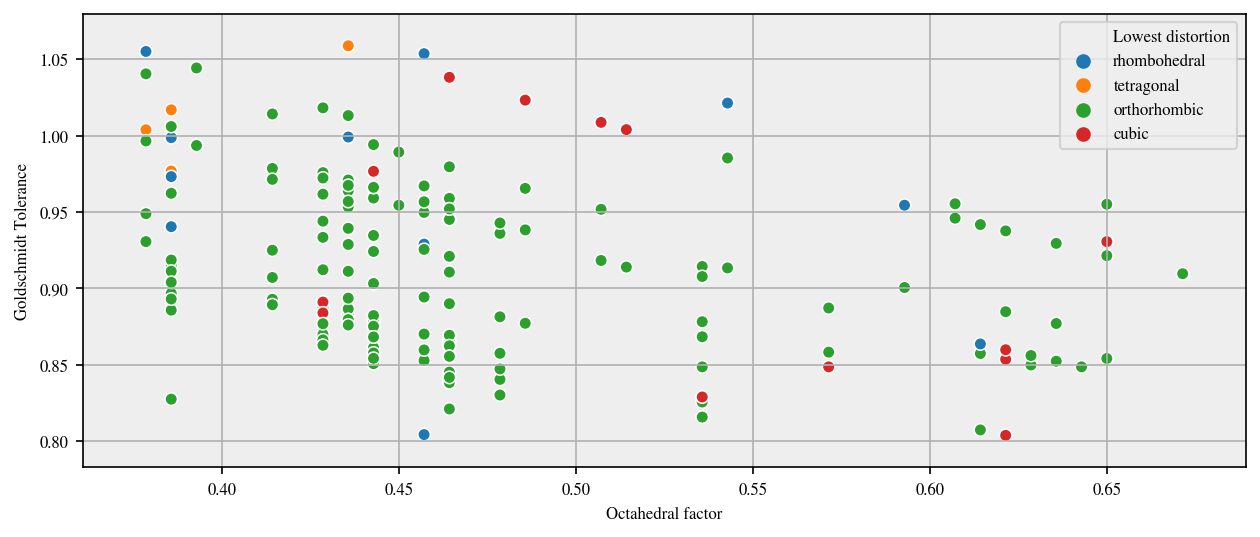

In [24]:
sns.scatterplot(test['Octahedral factor'],test['Goldschmidt Tolerance'],hue=test['Lowest distortion'])

In [25]:
#Should I cap the octahedral values from 0.3 to 1?
#How to do this?

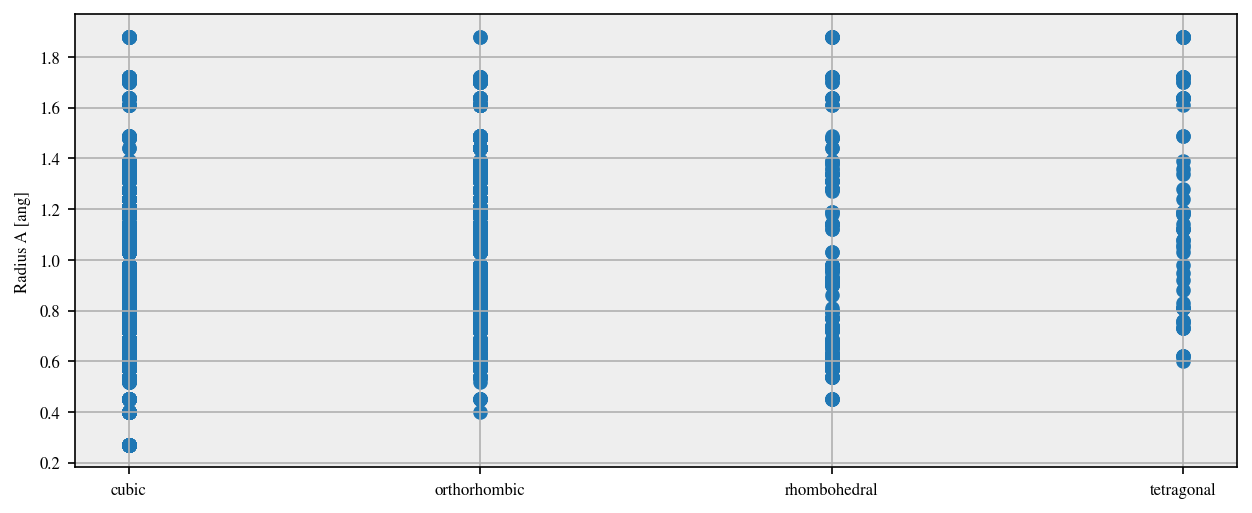

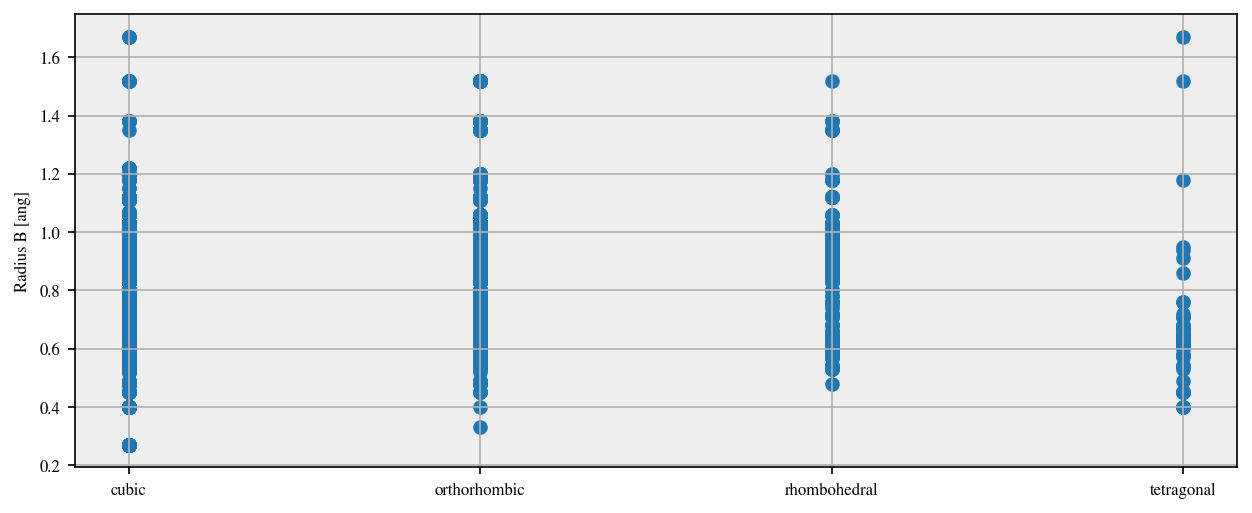

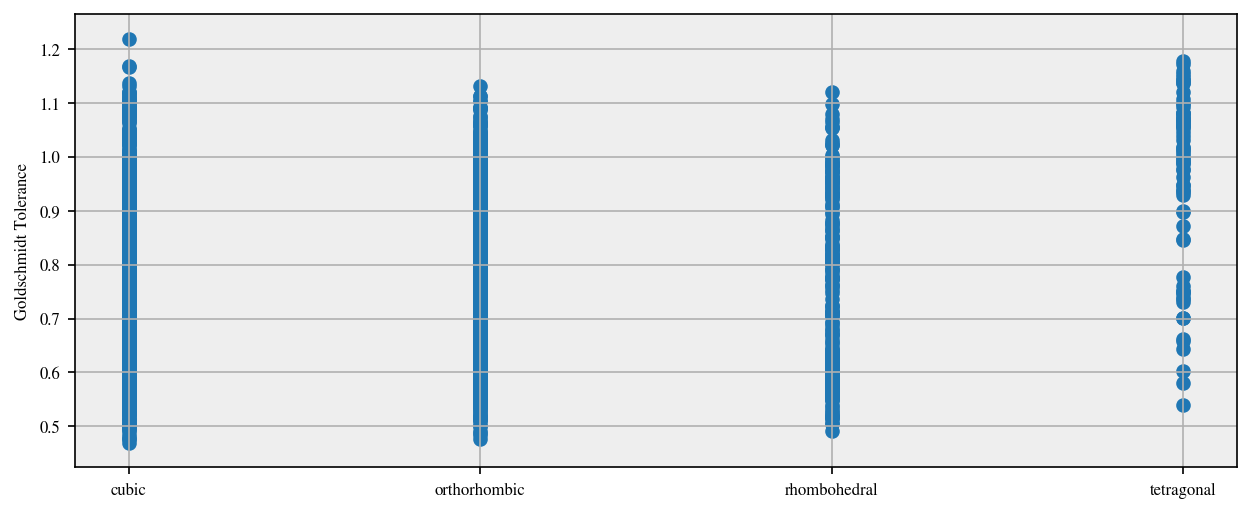

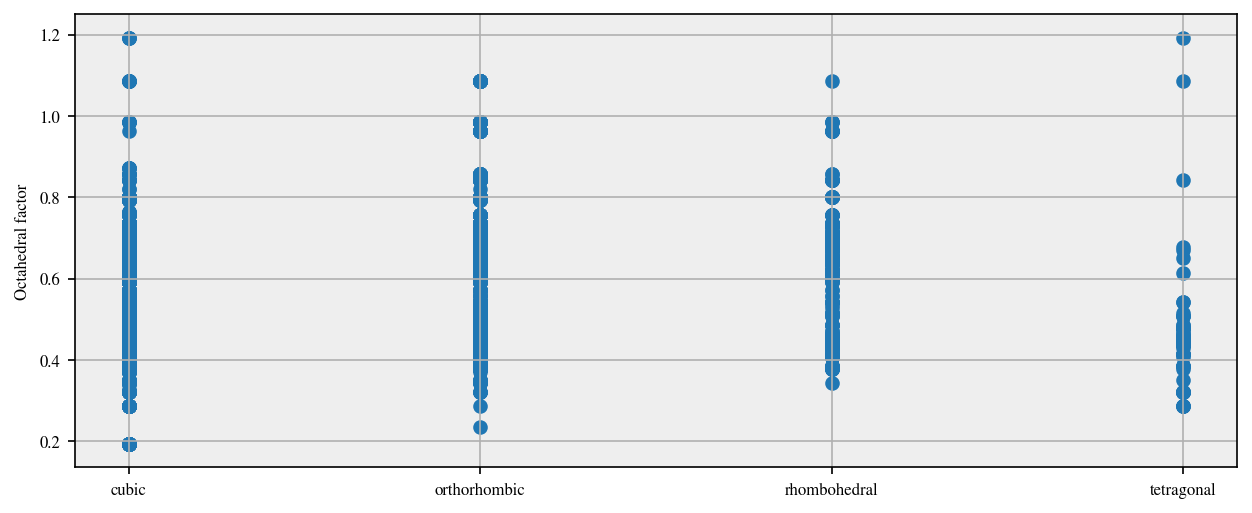

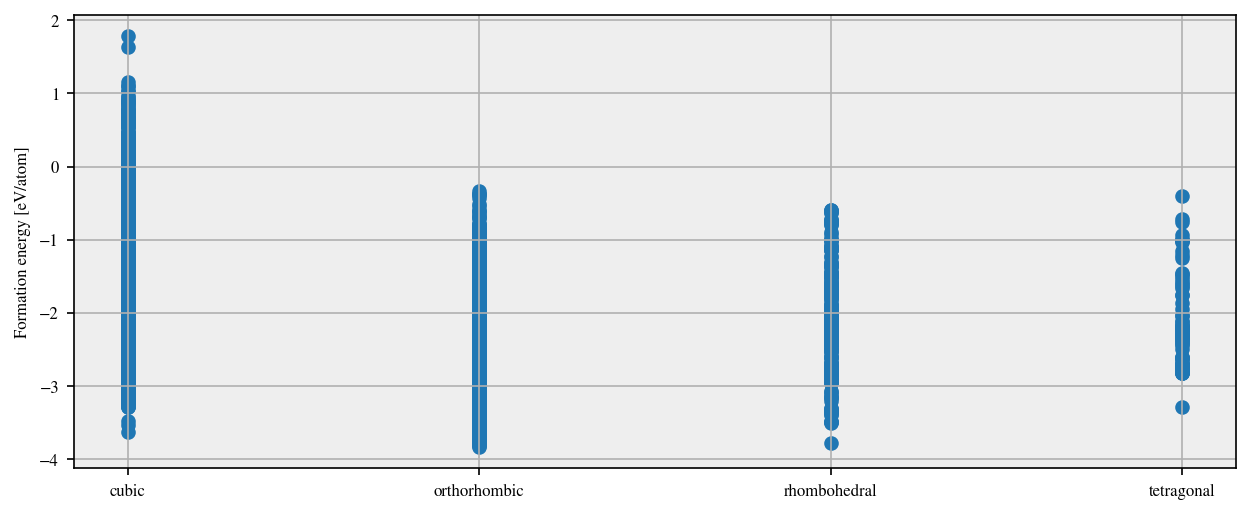

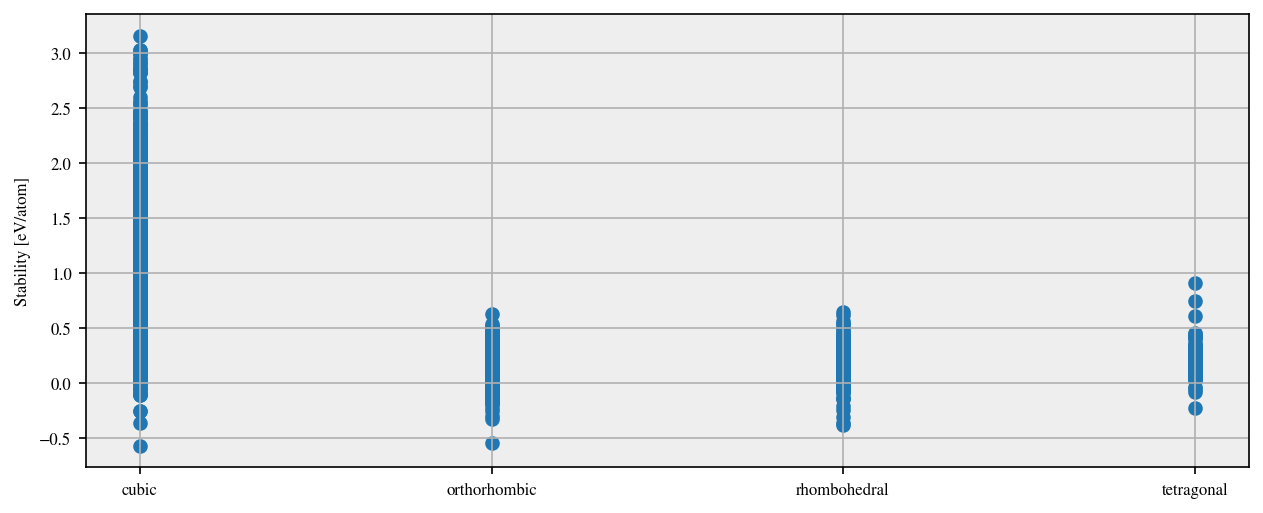

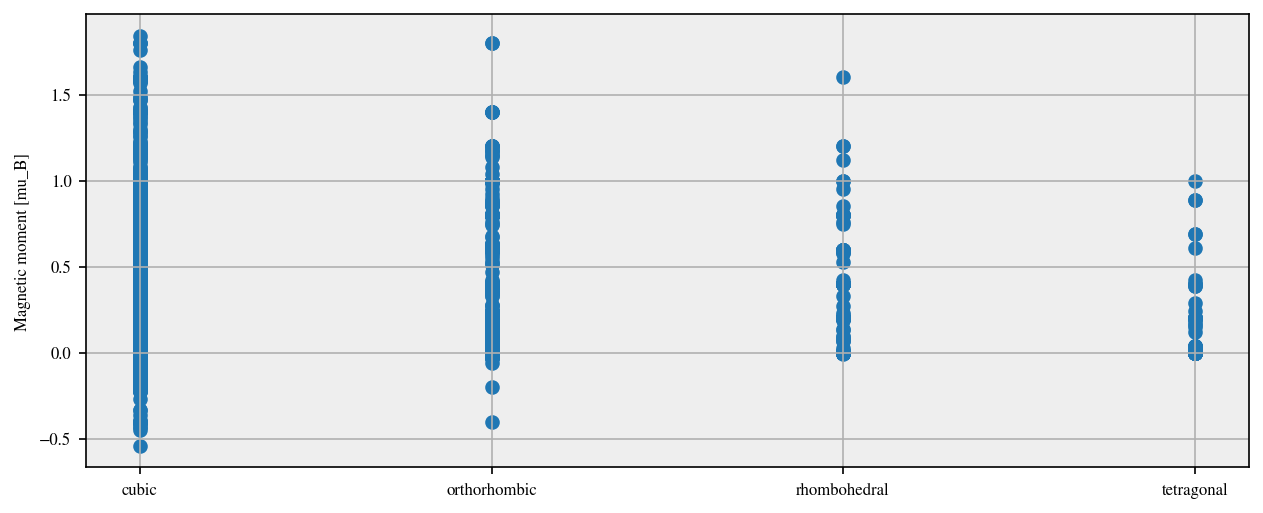

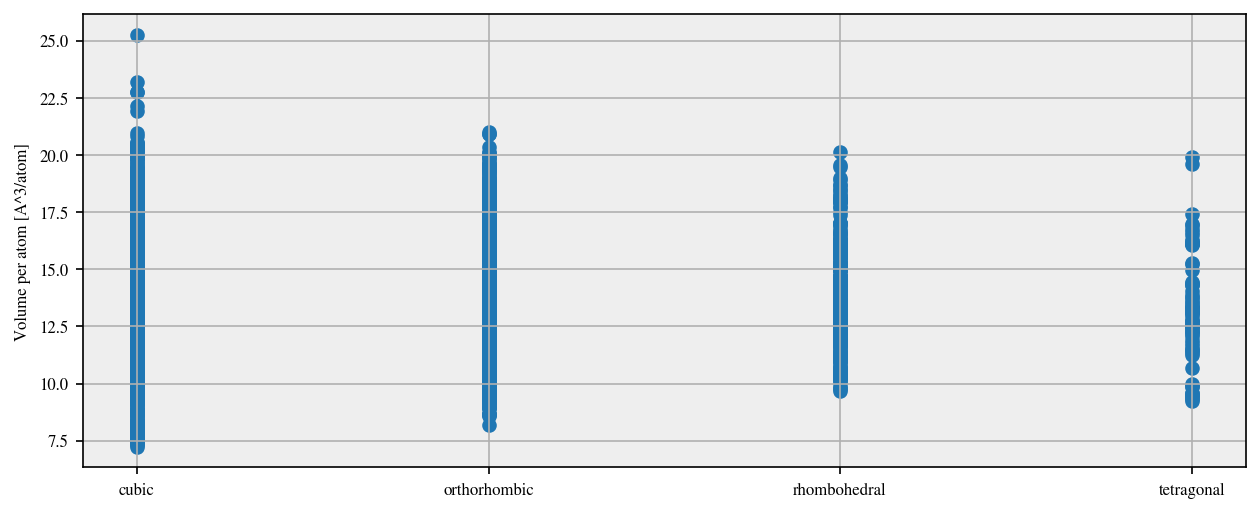

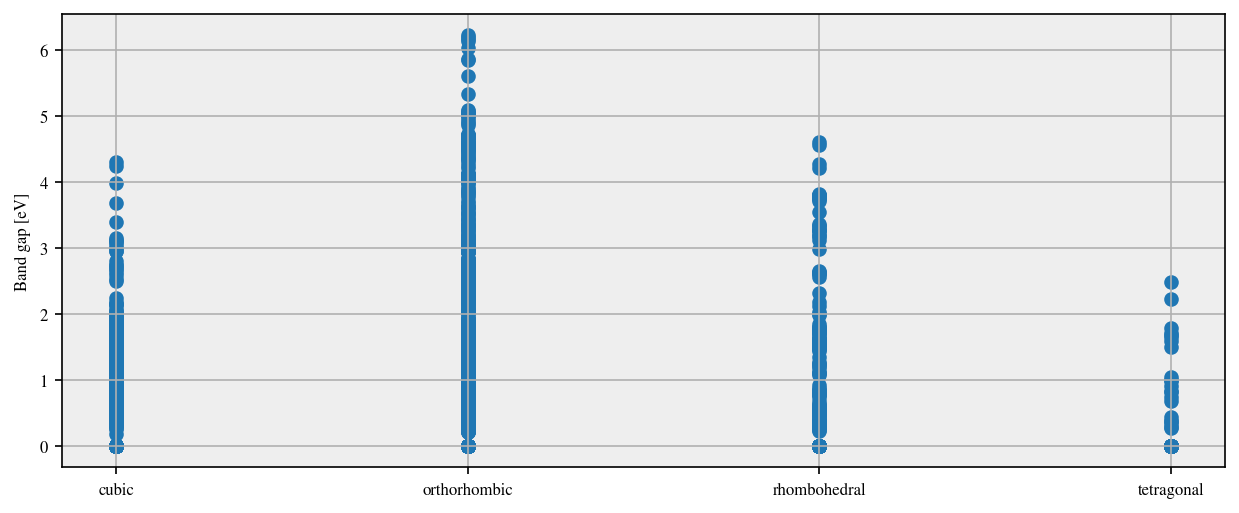

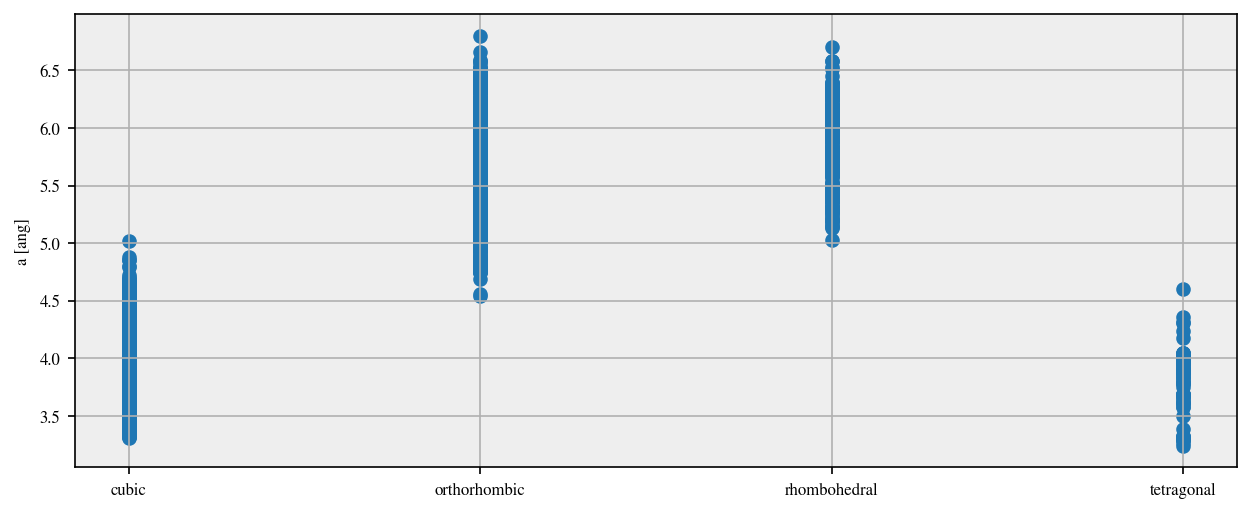

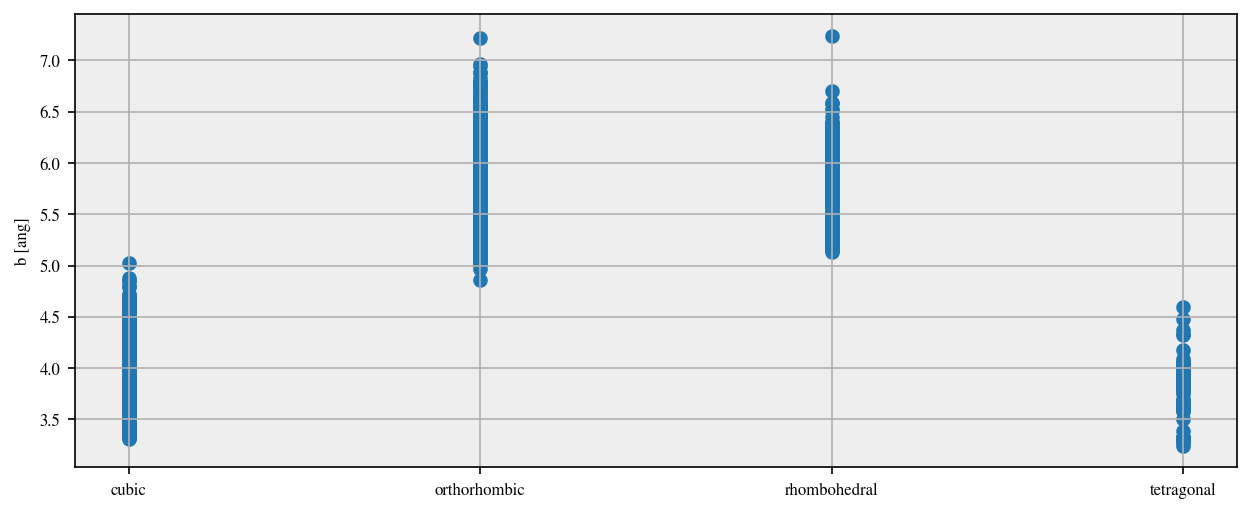

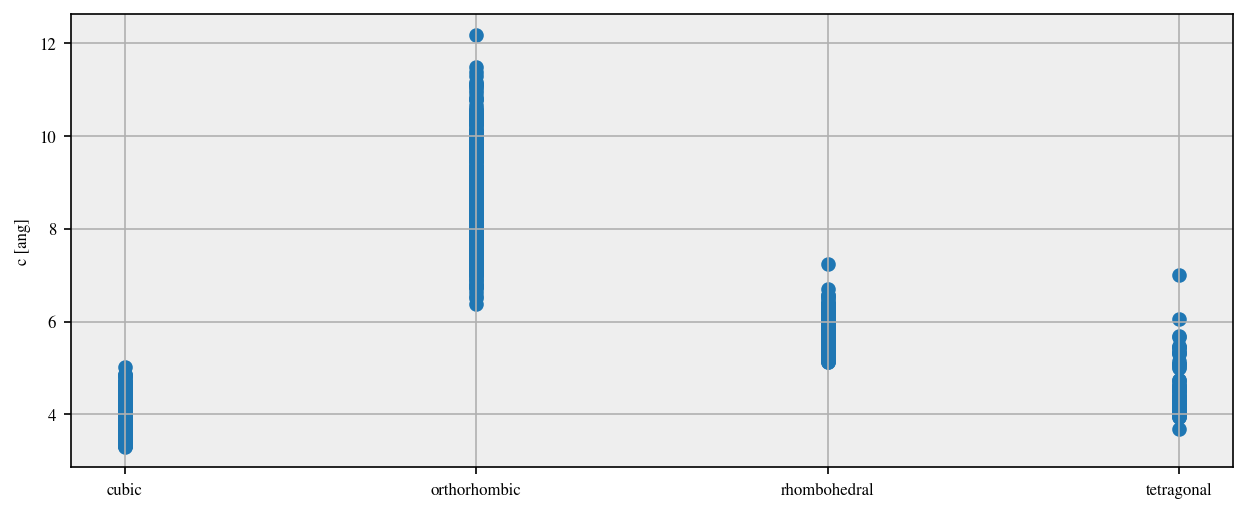

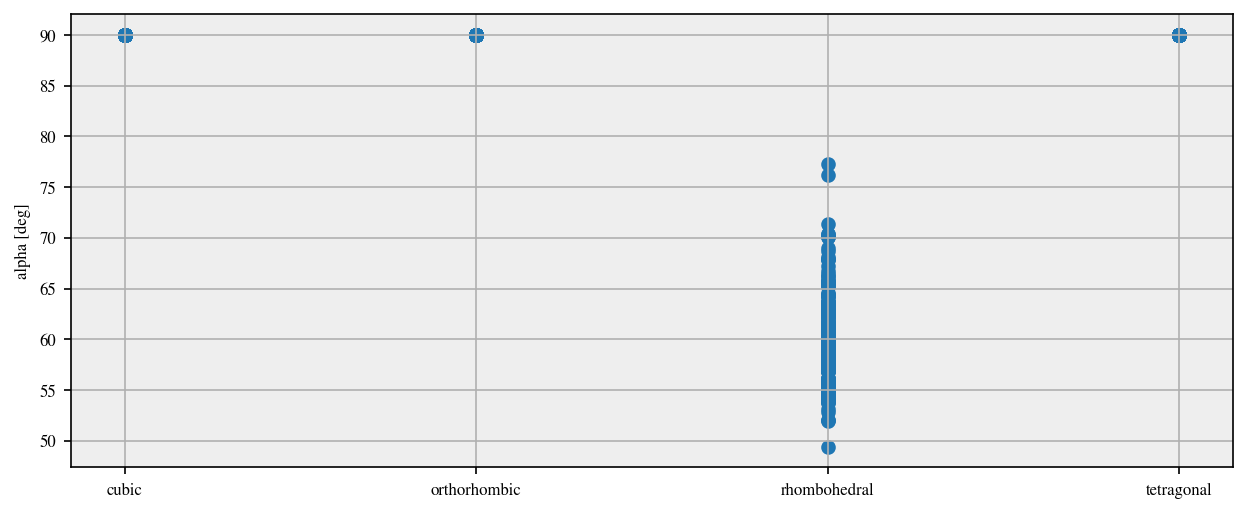

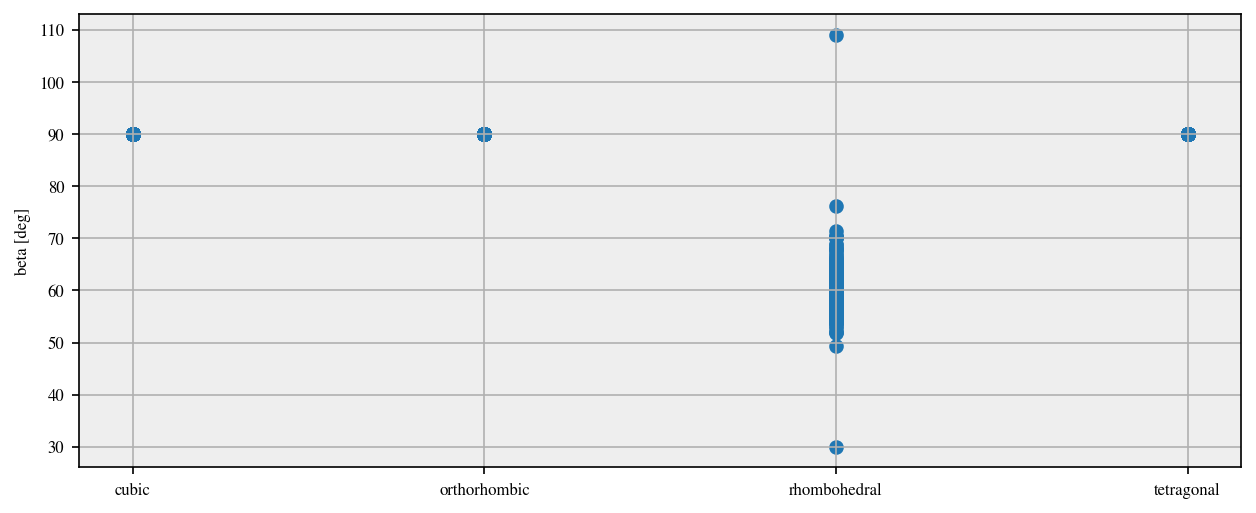

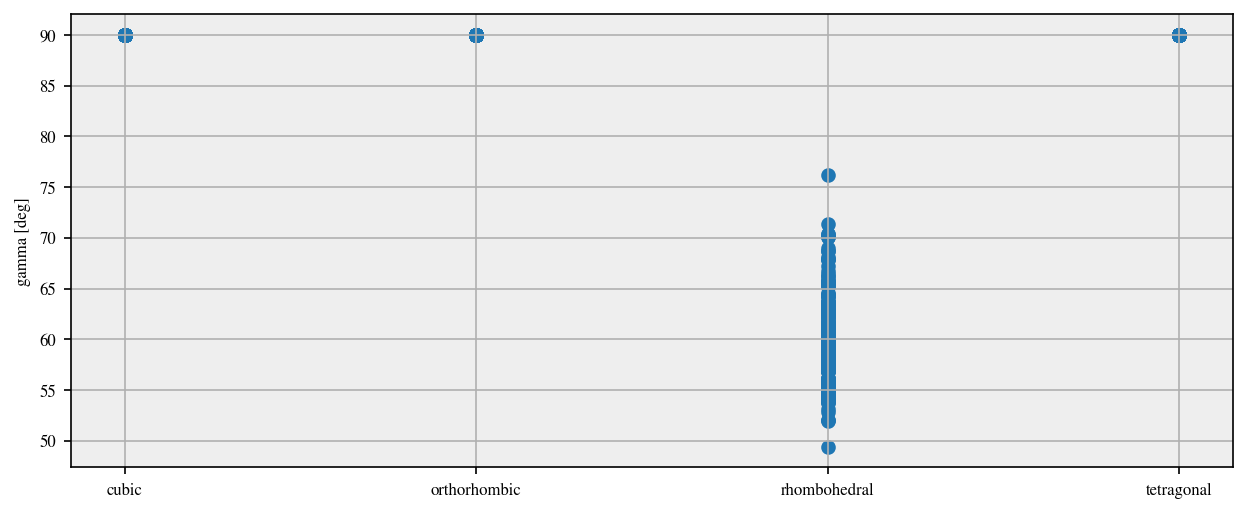

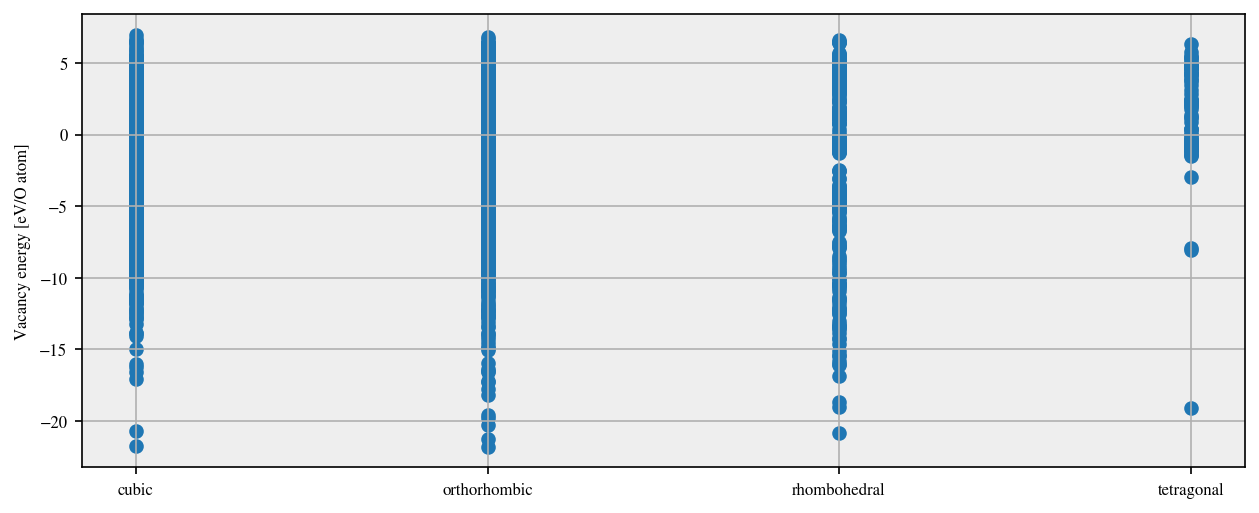

In [26]:
for i in numeric.columns:
    plt.scatter(df['Lowest distortion'], df[i])
    #plt.tight_layout()
    plt.ylabel(i)
    plt.show()
    
#Should I cap the stability value at 1. Because above 1 it is only cubic. How will this capping help?

In [27]:
for i in df['Lowest distortion'].unique():
    print('%s has vacancy energy mean = %f'%(i,df[df['Lowest distortion']==i]['Vacancy energy [eV/O atom]'].mean()))

cubic has vacancy energy mean = -0.923054
orthorhombic has vacancy energy mean = -0.471513
rhombohedral has vacancy energy mean = -2.762137
tetragonal has vacancy energy mean = 1.319859


In [28]:
for i in df['Lowest distortion'].unique():
    print('%s has magnetic moment mean = %f'%(i,df[df['Lowest distortion']==i]['Magnetic moment [mu_B]'].mean()))

cubic has magnetic moment mean = 0.334711
orthorhombic has magnetic moment mean = 0.234952
rhombohedral has magnetic moment mean = 0.252607
tetragonal has magnetic moment mean = 0.152254


## Replacing missing magnetic and valence energy values with means of corresponding crystal structure

In [29]:
missing_values='-'

In [30]:
ogdf=pd.read_csv('data_perovskites.csv',na_values=missing_values)

In [31]:
ogdf.dropna(subset = ["Lowest distortion"], inplace=True)

In [32]:
ogdf.isna().sum()

Chemical formula                0
A                               0
B                               0
In literature                   0
Valence A                       0
Valence B                       0
Radius A [ang]                  0
Radius B [ang]                  0
Lowest distortion               0
Formation energy [eV/atom]      0
Stability [eV/atom]             0
Magnetic moment [mu_B]        960
Volume per atom [A^3/atom]      0
Band gap [eV]                   0
a [ang]                         0
b [ang]                         0
c [ang]                         0
alpha [deg]                     0
beta [deg]                      0
gamma [deg]                     0
Vacancy energy [eV/O atom]    362
dtype: int64

In [33]:
only_cubic=ogdf[ogdf['Lowest distortion']=='cubic']
only_orthorhombic=ogdf[ogdf['Lowest distortion']=='orthorhombic']
only_rhombohedral=ogdf[ogdf['Lowest distortion']=='rhombohedral']
only_tetragonal=ogdf[ogdf['Lowest distortion']=='tetragonal']

In [34]:
only_cubic.isna().sum()

Chemical formula                0
A                               0
B                               0
In literature                   0
Valence A                       0
Valence B                       0
Radius A [ang]                  0
Radius B [ang]                  0
Lowest distortion               0
Formation energy [eV/atom]      0
Stability [eV/atom]             0
Magnetic moment [mu_B]        580
Volume per atom [A^3/atom]      0
Band gap [eV]                   0
a [ang]                         0
b [ang]                         0
c [ang]                         0
alpha [deg]                     0
beta [deg]                      0
gamma [deg]                     0
Vacancy energy [eV/O atom]    171
dtype: int64

In [35]:
only_cubic['Magnetic moment [mu_B]'].fillna(0.334711,inplace=True)
only_orthorhombic['Magnetic moment [mu_B]'].fillna(0.234952,inplace=True)
only_rhombohedral['Magnetic moment [mu_B]'].fillna(0.252607,inplace=True)
only_tetragonal['Magnetic moment [mu_B]'].fillna(0.152254,inplace=True)

In [36]:
only_cubic['Vacancy energy [eV/O atom]'].fillna(-0.923054,inplace=True)
only_orthorhombic['Vacancy energy [eV/O atom]'].fillna(-0.471513,inplace=True)
only_rhombohedral['Vacancy energy [eV/O atom]'].fillna(-2.762137,inplace=True)
only_tetragonal['Vacancy energy [eV/O atom]'].fillna(1.319859,inplace=True)

In [37]:
newdf = pd.concat([only_tetragonal,only_rhombohedral,only_orthorhombic,only_cubic])

In [38]:
newdf['Goldschmidt Tolerance']=(newdf['Radius A [ang]']+1.4)/((2**.5)*(newdf['Radius B [ang]']+1.4))

In [39]:
newdf['Octahedral factor']=(newdf['Radius B [ang]']/1.4)

In [40]:
new_data=pd.read_csv('rhombohedral.csv')

In [41]:
new_data=new_data[['ABO3','rA at 12 [ang]','rA at 6 [ang]','rB at 6 [ang]','tR']]

In [42]:
newdf=pd.merge(newdf,new_data,how='left',left_on='Chemical formula',right_on='ABO3')

In [43]:
newdf['New Tolerance Factor']=((newdf['rA at 6 [ang]']/newdf['rA at 12 [ang]'])/3)*((newdf['Radius A [ang]']+1.4)/(newdf['Radius B [ang]']+1.4))*((newdf['Radius B [ang]']+1.4)/1.4*(2**0.5))*((newdf['Radius A [ang]']+1.4)/1.4*(2**0.5))

In [44]:
#newdf=newdf[newdf['Valence A']!='not balanced']

In [45]:
#newdf=newdf[newdf['Valence A']!='element not in BV']

In [46]:
#newdf['Valence A']=pd.to_numeric(newdf['Valence A'],downcast='float')
#newdf['Valence B']=pd.to_numeric(newdf['Valence B'],downcast='float')

In [47]:
newdf['Lowest distortion'].value_counts()/5276

cubic           0.616566
orthorhombic    0.298143
rhombohedral    0.061221
tetragonal      0.024071
Name: Lowest distortion, dtype: float64

In [48]:
truedf=newdf[newdf['In literature']==True]

In [49]:
supposed_rhom = truedf[(truedf['tR'] >= 0.9) & (truedf['tR'] <= 1.1)]

In [50]:
supposed_rhom['Lowest distortion'].value_counts()

orthorhombic    145
rhombohedral     10
cubic             9
tetragonal        3
Name: Lowest distortion, dtype: int64

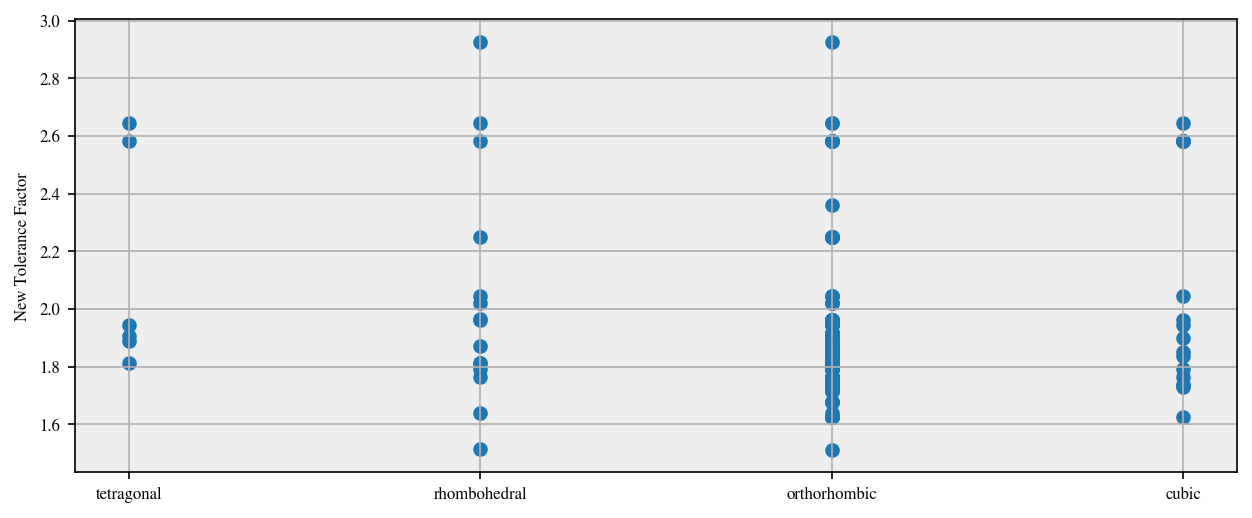

In [51]:
plt.scatter(newdf[newdf['In literature']==True]['Lowest distortion'], newdf[newdf['In literature']==True]['New Tolerance Factor'])
#plt.tight_layout()
plt.ylabel('New Tolerance Factor')
plt.show()

### building the model on on real values

In [52]:
#newdf=newdf[newdf['In literature']==True]

In [53]:
categorical = newdf.select_dtypes(include=[np.object])

numeric = newdf.select_dtypes(include=[np.int,np.float,np.float32])
numeric_cols = numeric.columns

numeric_cols

non_cat=categorical.drop(['Chemical formula','A','B','Valence A','Valence B','Lowest distortion','ABO3'],axis=1)

for i in non_cat.columns:
    df[i]=pd.to_numeric(df[i],downcast='float')
    non_cat[i]=pd.to_numeric(non_cat[i],downcast='float')


numeric=pd.concat([numeric,non_cat],axis=1)

## Model Building

In [54]:
numeric.columns

Index(['Radius A [ang]', 'Radius B [ang]', 'Formation energy [eV/atom]',
       'Stability [eV/atom]', 'Magnetic moment [mu_B]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]', 'a [ang]', 'b [ang]',
       'c [ang]', 'alpha [deg]', 'beta [deg]', 'gamma [deg]',
       'Vacancy energy [eV/O atom]', 'Goldschmidt Tolerance',
       'Octahedral factor', 'rA at 12 [ang]', 'rA at 6 [ang]', 'rB at 6 [ang]',
       'tR', 'New Tolerance Factor'],
      dtype='object')

In [55]:
numeric

,Radius A [ang],Radius B [ang],Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom],Goldschmidt Tolerance,Octahedral factor,rA at 12 [ang],rA at 6 [ang],rB at 6 [ang],tR,New Tolerance Factor
0,1.12,1.67,-1.60,0.75,0.000000,19.92,0.00,4.18,4.18,5.70,90.0,90.0,90.0,-1.41,0.580426,1.192857,1.12,1.12,1.67,1.214883,2.160000
1,1.12,0.40,-2.78,0.40,0.000000,12.76,0.00,3.79,3.79,4.44,90.0,90.0,90.0,4.34,0.989949,0.285714,1.12,1.12,0.40,1.194086,2.160000
2,1.28,0.46,-0.82,0.29,0.152254,11.37,0.00,3.57,3.57,4.46,90.0,90.0,90.0,0.53,1.018842,0.328571,1.28,0.95,0.46,0.923839,1.813159
3,1.28,0.40,-1.63,0.32,0.152254,10.22,0.00,3.32,3.32,4.64,90.0,90.0,90.0,0.19,1.052803,0.285714,1.28,0.95,0.40,0.928222,1.813159
4,1.28,0.54,-1.58,0.13,0.000000,11.42,0.34,3.68,3.68,4.21,90.0,90.0,90.0,1.83,0.976828,0.385714,1.28,0.95,0.54,0.919137,1.813159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,0.89,0.54,-2.21,0.88,0.540000,11.09,0.00,3.81,3.81,3.81,90.0,90.0,90.0,2.40,0.834678,0.385714,0.89,0.72,0.54,0.894528,1.442999
5272,0.89,0.62,-1.64,1.20,0.340000,12.20,0.00,3.94,3.94,3.94,90.0,90.0,90.0,0.19,0.801621,0.442857,0.89,0.72,0.62,0.892819,1.442999
5273,0.89,0.90,-2.13,1.42,0.200000,15.28,0.00,4.24,4.24,4.24,90.0,90.0,90.0,-4.92,0.704032,0.642857,0.89,0.72,0.90,0.893744,1.442999
5274,0.89,0.74,-1.63,1.21,0.000000,10.80,0.00,3.78,3.78,3.78,90.0,90.0,90.0,-0.76,0.756670,0.528571,0.89,0.72,0.74,0.892023,1.442999


In [56]:
categorical['Lowest distortion'].value_counts()

cubic           3253
orthorhombic    1573
rhombohedral     323
tetragonal       127
Name: Lowest distortion, dtype: int64

In [83]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [84]:
numeric.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in numeric.columns.values]


In [85]:
test=newdf

In [86]:
newdf['Lowest distortion'].value_counts()

orthorhombic    183
cubic            18
rhombohedral     15
tetragonal        6
Name: Lowest distortion, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

In [88]:
#le_target = LabelEncoder()
#test['Lowest distortion']= le_target.fit_transform(test['Lowest distortion'])

In [116]:
X=numeric.drop(['Volume per atom _A^3/atom_','a _ang_','b _ang_','c _ang_','alpha _deg_','beta _deg_','gamma _deg_'],axis=1)
y=test['Lowest distortion']

In [117]:
newdf['Lowest distortion'].value_counts()

1    183
0     18
2     15
3      6
Name: Lowest distortion, dtype: int64

In [118]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [119]:
train_data = pd.concat([X_train, y_train], axis=1)

In [120]:
train_data['Lowest distortion'].value_counts()

1    120
0     13
2     10
3      5
Name: Lowest distortion, dtype: int64

In [ ]:
majority= train_data[train_data['Lowest distortion']==0]
minority= train_data[train_data['Lowest distortion']==1]

In [ ]:
# upsample minority
min_upsampled = resample(minority,
 replace=True, # sample with replacement
 n_samples=len(majority), # match number in majority class
 random_state=27) # reproducible results

In [121]:
#cubic = train_data[train_data['Lowest distortion']==0]
#orthorhombic = train_data[train_data['Lowest distortion']==1]
#rhombohedral = train_data[train_data['Lowest distortion']==2]
#tetragonal= train_data[train_data['Lowest distortion']==3]

In [122]:
# upsample minority
#rho_upsampled = resample(rhombohedral,
 #replace=True, # sample with replacement
# n_samples=len(orthorhombic), # match number in majority class
# random_state=27) # reproducible results

# upsample minority
#tetra_upsampled = resample(tetragonal,
 #replace=True, # sample with replacement
 #n_samples=len(orthorhombic), # match number in majority class
 #random_state=27) # reproducible results

# upsample minority
#cubic_upsampled = resample(cubic,
 #replace=True, # sample with replacement
 #n_samples=len(orthorhombic), # match number in majority class
 #random_state=27) # reproducible results

In [95]:
# upsample minority
#rho_upsampled = resample(rhombohedral,
 #replace=True, # sample with replacement
 #n_samples=len(cubic), # match number in majority class
 #random_state=27) # reproducible results

# upsample minority
#tetra_upsampled = resample(tetragonal,
 #replace=True, # sample with replacement
 #n_samples=len(cubic), # match number in majority class
 #random_state=27) # reproducible results

# upsample minority
#ortho_upsampled = resample(orthorhombic,
 #replace=True, # sample with replacement
 #n_samples=len(cubic), # match number in majority class
 #random_state=27) # reproducible results


In [123]:
#upsampled = pd.concat([orthorhombic, rho_upsampled, cubic_upsampled, tetra_upsampled])

In [114]:
#upsampled = pd.concat([cubic, rho_upsampled, ortho_upsampled, tetra_upsampled])

In [ ]:
upsampled = pd.concat([min_upsampled,majority])

In [124]:
upsampled['Lowest distortion'].value_counts()

3    120
2    120
1    120
0    120
Name: Lowest distortion, dtype: int64

In [125]:
X_new=upsampled.drop('Lowest distortion',axis=1)
y_new=upsampled['Lowest distortion']

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score


In [127]:
classifiers=list()
model1 = XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [128]:
classifiers

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples

In [129]:
y_new

629     1
663     1
606     1
685     1
1106    1
       ..
4       3
6       3
6       3
59      3
4       3
Name: Lowest distortion, Length: 480, dtype: int32

In [130]:
#for clf in classifiers:
 #   clf.fit(X_new, y_new)
  #  y_pred= model.predict(X_test)
   # acc = accuracy_score(y_test, y_pred)
    #print("Accuracy of %s is %s"%(clf,acc))
    #cm = confusion_matrix(y_test, y_pred)
   # print("Confusion Matrix of %s is %s"%(clf,cm))

## Support Vector Machine

In [131]:
model2.fit(X_new, y_new)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
model2.score(X_new,y_new)

0.70625

In [133]:
model2.score(X_test,y_test)

0.6216216216216216

In [134]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

preds = model2.predict(X_test)
accuracy_score(preds,y_test)

0.6216216216216216

In [135]:
confusion_matrix(preds,y_test)

array([[ 2,  4,  1,  0],
       [ 0, 41,  1,  1],
       [ 1,  8,  3,  0],
       [ 2, 10,  0,  0]], dtype=int64)

In [136]:
y_test.value_counts()

1    63
2     5
0     5
3     1
Name: Lowest distortion, dtype: int64

In [137]:
pd.Series(preds).value_counts()

1    43
3    12
2    12
0     7
dtype: int64

In [256]:
# The orthorhombic are being incorrectly identified at rhombohedral and tetragonal

In [138]:
#accuracy 0.8076923076923077
#confusion matrix
#array([[973,   2,   2,   2],
#       [  6, 332,  33,   2],
#       [  7, 101,  59,   0],
#       [ 62,  89,  29,  43]], dtype=int64)

#accuracy not changed after introducing valence a and b
# on introducing new tolerance factor accuracy improved to 0.8352468427095293

#on building only on experimentall true data
#0.6216216216216216
#array([[ 2,  4,  1,  0],
  #     [ 0, 41,  1,  1],
      # [ 1,  8,  3,  0],
     #  [ 2, 10,  0,  0]], dtype=int64)

## XGBoost

In [139]:
X_new

,Radius A _ang_,Radius B _ang_,Formation energy _eV/atom_,Stability _eV/atom_,Magnetic moment _mu_B_,Band gap _eV_,Vacancy energy _eV/O atom_,Goldschmidt Tolerance,Octahedral factor,rA at 12 _ang_,rA at 6 _ang_,rB at 6 _ang_,New Tolerance Factor
629,1.38,0.65,-1.55,0.02,1.000000,1.28,2.59,0.958906,0.464286,1.38,0.90,0.65,1.714374
663,1.34,0.55,-2.61,0.05,0.400000,0.54,1.46,0.993576,0.392857,1.34,1.00,0.55,1.905676
606,1.61,0.94,-3.62,0.00,0.000000,4.36,6.15,0.909569,0.671429,1.61,1.35,0.94,2.584006
685,1.34,0.69,-2.53,0.02,0.234952,2.74,3.48,0.927020,0.492857,1.34,1.00,0.69,1.905676
1106,1.36,0.68,-2.40,0.04,0.200000,0.00,2.05,0.938276,0.485714,1.36,1.03,0.68,1.962317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.28,0.54,-1.58,0.13,0.000000,0.34,1.83,0.976828,0.385714,1.28,0.95,0.54,1.813159
6,1.61,0.61,-3.29,-0.03,0.000000,1.68,5.36,1.058901,0.435714,1.61,1.35,0.61,2.584006
6,1.61,0.61,-3.29,-0.03,0.000000,1.68,5.36,1.058901,0.435714,1.61,1.35,0.61,2.584006
59,1.64,0.64,-2.70,-0.22,0.000000,1.71,5.48,1.053728,0.457143,1.64,1.38,0.64,2.645057


In [140]:
model1.fit(X_new, y_new)
model1.score(X_new,y_new)

1.0

In [141]:
model1.score(X_test,y_test)

0.9054054054054054

In [142]:
preds = model1.predict(X_test)
accuracy_score(preds,y_test)

0.9054054054054054

In [143]:
confusion_matrix(preds,y_test)

array([[ 3,  0,  0,  0],
       [ 1, 61,  3,  0],
       [ 0,  2,  2,  0],
       [ 1,  0,  0,  1]], dtype=int64)

In [144]:
pd.Series(preds).value_counts()

1    65
2     4
0     3
3     2
dtype: int64

In [145]:
#accuracy 0.8960964408725602 with only orignal data
#confusion matrix
#array([[1004,    3,    2,    2],
#       [   9,  433,   30,    3],
#       [  25,   68,   86,    4],
#       [  10,   20,    5,   38]], dtype=int64)

## accuracy decreased to 0.8864569083447332 after introducing valence a and b
# accuracy on having new tolerance factor =0.8938002296211252

#on building only on experimentall true data
#0.9054054054054054
#array([[ 3,  0,  0,  0],
      # [ 1, 61,  3,  0],
     #  [ 0,  2,  2,  0],
    #   [ 1,  0,  0,  1]], dtype=int64)

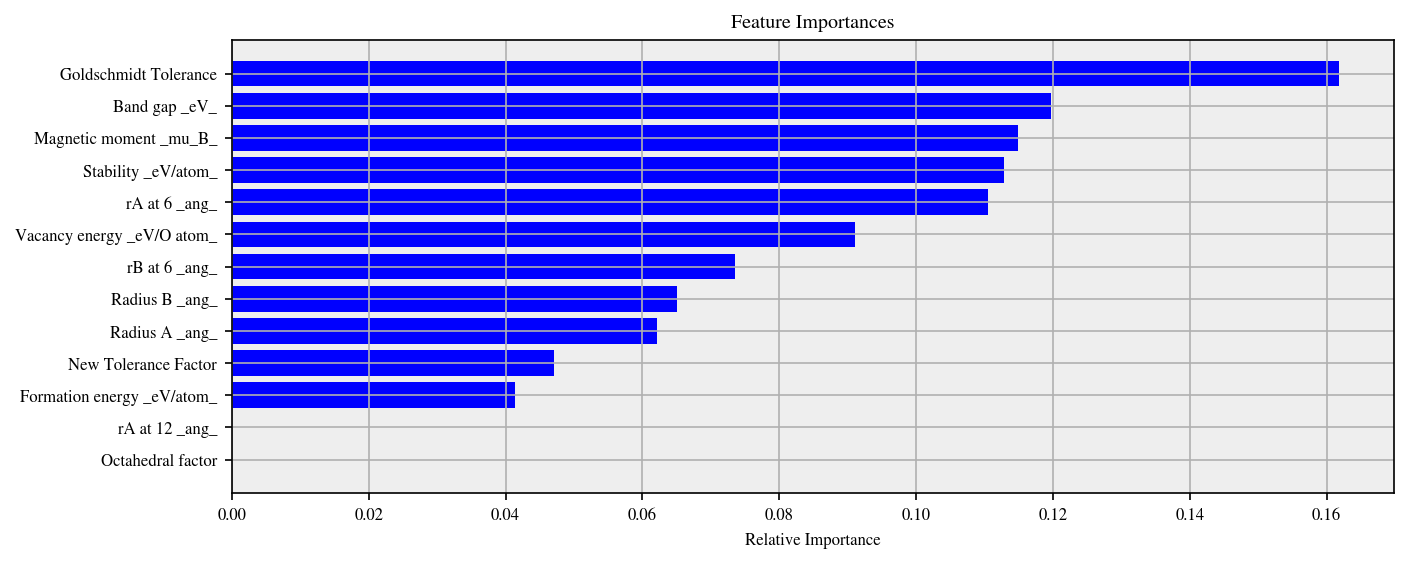

In [146]:
features = X_new.columns
importances = model1.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Decision Tree

In [147]:
model3.fit(X_new, y_new)
model3.score(X_new,y_new)

1.0

In [148]:
model3.score(X_test,y_test)

0.8783783783783784

In [149]:
preds = model3.predict(X_test)
accuracy_score(preds,y_test)

0.8783783783783784

In [150]:
confusion_matrix(preds,y_test)

array([[ 3,  1,  0,  0],
       [ 2, 60,  3,  0],
       [ 0,  1,  2,  1],
       [ 0,  1,  0,  0]], dtype=int64)

In [151]:
pd.Series(preds).value_counts()

1    65
2     4
0     4
3     1
dtype: int64

In [153]:
#accuracy 0.883467278989667
#confusion matrix
#array([[1018,   27,   14,    8],
       #[  16,  439,   50,    8],
       #[  12,   41,   55,    4],
       #[   2,   17,    4,   27]], dtype=int64)
    
#after valence a and b
#0.8741450068399452
# accuracy with new tolerance factor 0.8880597014925373

#Using only experimnetally proved data
#0.8783783783783784
#array([[ 3,  1,  0,  0],
 #      [ 2, 60,  3,  0],
 #      [ 0,  1,  2,  1],
#       [ 0,  1,  0,  0]], dtype=int64)

## Random Forest

In [154]:
model4.fit(X_new, y_new)
model4.score(X_new,y_new)

1.0

In [155]:
model4.score(X_test,y_test)

0.918918918918919

In [156]:
preds = model3.predict(X_test)
accuracy_score(preds,y_test)

0.8783783783783784

In [157]:
confusion_matrix(preds,y_test)

array([[ 3,  1,  0,  0],
       [ 2, 60,  3,  0],
       [ 0,  1,  2,  1],
       [ 0,  1,  0,  0]], dtype=int64)

In [158]:
#accuracy 0.883467278989667
#confusion matrix
#array([[1018,   27,   14,    8],
       #[  16,  439,   50,    8],
       #[  12,   41,   55,    4],
       #[   2,   17,    4,   27]], dtype=int64)
    
#after valence a and b
#0.8741450068399452
# accuracy with new tolerance factor 0.8880597014925373

#Using only experimnetally proved data
#0.8783783783783784
#array([[ 3,  1,  0,  0],
 #      [ 2, 60,  3,  0],
 #      [ 0,  1,  2,  1],
#       [ 0,  1,  0,  0]], dtype=int64)